In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from typing import List

In [6]:
house_df = pd.read_csv("complete_houses_mod.csv")
house_df.columns

Index(['Unnamed: 0', 'id', 'Zip', 'Price', 'Price of square meter',
       'Living area', 'Number of rooms', 'Garden surface', 'Terrace surface',
       'Open fire', 'Surface of the land', 'Number of facades',
       'Swimming pool', 'Building Cond. values', 'Kitchen values',
       'Primary energy consumption', 'Energy efficiency'],
      dtype='object')

In [7]:
# def detectOutliersHouseDf():
#     fig, axs = plt.subplots(2,3, figsize = (10,5))
#     plt1 = sns.boxplot(house_df['Number of rooms'], ax = axs[0,0])
#     plt2 = sns.boxplot(house_df['Living area'], ax = axs[0,1])
#     plt3 = sns.boxplot(house_df['Surface of the land'], ax = axs[0,2])
#     plt1 = sns.boxplot(house_df['Terrace surface'], ax = axs[1,0])
#     plt2 = sns.boxplot(house_df['Garden surface'], ax = axs[1,1])
#     # plt3 = sns.boxplot(house_df['parking'], ax = axs[1,2])
#     plt.tight_layout()

# detectOutliersHouseDf()

In [8]:
# Remove outliers
def remove_outliers(house_df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = house_df[col].mean()
        sd = house_df[col].std()
        
        house_df = house_df[(house_df[col] <= mean+(n_std*sd))]
        
    return house_df

no_outliers_df = remove_outliers(house_df, ['Number of rooms','Living area', 'Surface of the land', 'Terrace surface',
'Garden surface','Number of facades', 'Surface of the land'], 3)

# 'Primary energy consumption','Energy efficiency', 'Kitchen values',
# 'Building Cond. values','Swimming pool','Open fire'

Working on column: Number of rooms
Working on column: Living area
Working on column: Surface of the land
Working on column: Terrace surface
Working on column: Garden surface
Working on column: Number of facades
Working on column: Surface of the land


In [9]:
# no_outliers_df.isnull().sum()

In [10]:
X = no_outliers_df

y = no_outliers_df['Price']

In [11]:
X =  X.drop(["Unnamed: 0", "id", "Price of square meter", 'Price', 'Zip', 'Garden surface'], axis=1)

X.columns

Index(['Living area', 'Number of rooms', 'Terrace surface', 'Open fire',
       'Surface of the land', 'Number of facades', 'Swimming pool',
       'Building Cond. values', 'Kitchen values', 'Primary energy consumption',
       'Energy efficiency'],
      dtype='object')

In [12]:
y

0       349000
1       625000
2       149000
3       335000
4       545000
         ...  
9339    382230
9340    382484
9341    384070
9342    406000
9343    428500
Name: Price, Length: 8905, dtype: int64

In [13]:
# def detectOutliers():
#     fig, axs = plt.subplots(2,3, figsize = (10,5))
#     plt1 = sns.boxplot(no_outliers_df['Number of rooms'], ax = axs[0,0])
#     plt2 = sns.boxplot(no_outliers_df['Living area'], ax = axs[0,1])
#     plt3 = sns.boxplot(no_outliers_df['Surface of the land'], ax = axs[0,2])
#     plt1 = sns.boxplot(no_outliers_df['Terrace surface'], ax = axs[1,0])
#     plt2 = sns.boxplot(no_outliers_df['Garden surface'], ax = axs[1,1])
#     # plt3 = sns.boxplot(no_outliers_df['parking'], ax = axs[1,2])
#     plt.tight_layout()

# detectOutliers()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
X_train.shape

(7124, 11)

In [16]:
X.shape

(8905, 11)

In [17]:
lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression()

In [18]:
# Now let’s evaluate the model by checking out its coefficients 
# and how we can interpret them.
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficient'])

coeff_df

-300565.8172980623


,Coefficient
Living area,1243.674596
Number of rooms,39485.322943
Terrace surface,65.965915
Open fire,50110.734423
Surface of the land,37.325715
Number of facades,15899.849124
Swimming pool,167124.322113
Building Cond. values,42539.774112
Kitchen values,52676.973040
Primary energy consumption,28.050474


In [19]:
predictions = lm.predict(X_test)

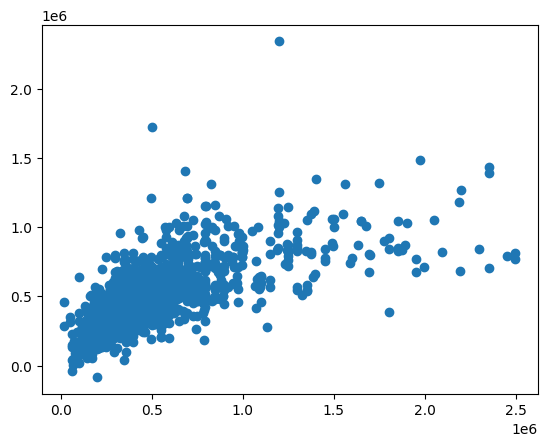

In [20]:
plt.scatter(y_test,predictions)
# Good prediction would appear as a line.

(-103750.0, 2618750.0, -206240.44644802308, 2462174.1769939004)

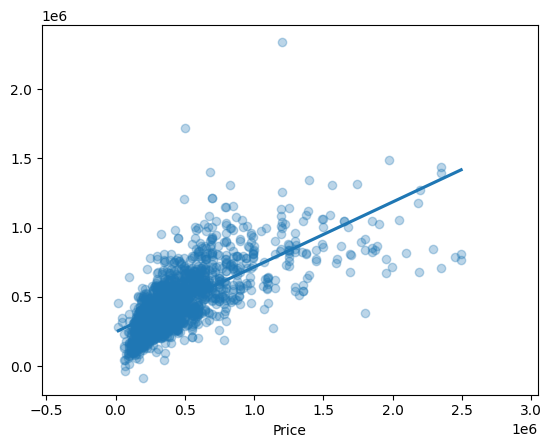

In [21]:
sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})
plt.axis('equal')

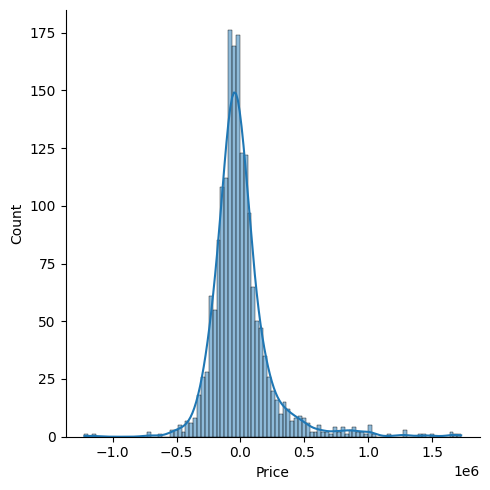

In [22]:
sns.displot((y_test-predictions), kde=True)
# If the data is displayed in a bell shape, we did well

In [23]:
print("true ", y_test.shape)
print("pred ", predictions.shape)

true  (1781,)
pred  (1781,)


In [25]:
print('MAE:', metrics.mean_absolute_error(predictions, y_test))
print("r2 score ", metrics.r2_score(predictions, y_test))
print('MSE:', metrics.mean_squared_error(predictions, y_test)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(predictions, y_test))) 
score = lm.score(X_test, y_test)
score

MAE: 151236.81232129608
r2 score  -0.13695494424341348
MSE: 57776781902.66187
RMSE: 240368.0134765478


0.4915749885595737